In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Open the JSON file
with open('../moq_analysis/average_data/res1080fps30bit6gop(2,0,0)loss0delay0bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

# Add percentage of rendered frames for comparison
df_data_0.at[0, 'avg_percentage_rendered_frames'] = df_data_0['avg_rendered_frames'].iloc[0] / df_data_0['avg_total_frames'].iloc[0] * 100

# Add average delay for capturing a frame
df_data_0.at[0, 'avg_encoding_time'] += 9
df_data_0.at[0, 'avg_total_time'] += 9
df_data_0['_8_totalTime'] += 9

In [17]:
# Open the JSON file
with open('../moq_analysis/average_data/res1080fps30bit6gop(2,0,0)loss5delay0bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

# Add percentage of rendered frames for comparison
df_data_1.at[0, 'avg_percentage_rendered_frames'] = df_data_1['avg_rendered_frames'].iloc[0] / df_data_1['avg_total_frames'].iloc[0] * 100

# Add average delay for capturing a frame
df_data_1.at[0, 'avg_encoding_time'] += 9
df_data_1.at[0, 'avg_total_time'] += 9
df_data_1['_8_totalTime'] += 9

In [18]:
# Open the JSON file
with open('../dash_analysis/average_data/dash_frag100res1080fps30bit6gop2loss0delay0bw100 (avg).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

In [19]:
# Open the JSON file
with open('../dash_analysis/average_data/dash_frag100res1080fps30bit6gop2loss5delay0bw100 (avg).json', 'r') as file:
    json_data_data_3 = json.load(file)

# Convert JSON data to DataFrame
df_data_3 = pd.DataFrame(json_data_data_3)

In [20]:
# Extract the continuous data
timestamps_0 = df_data_0['_1_rawVideoTimestamp']
timestamps_1 = df_data_1['_1_rawVideoTimestamp']
timestamps_2 = df_data_2['second']
timestamps_3 = df_data_3['second']

total_time_0 = df_data_0['_8_totalTime']
total_time_1 = df_data_1['_8_totalTime']
total_time_2 = df_data_2['totalLatency']
behind_live_2 = df_data_2['behindLive']
buffer_2 = df_data_2['buffer']
total_time_3 = df_data_3['totalLatency']
behind_live_3 = df_data_3['behindLive']
buffer_3 = df_data_3['buffer']

# Extract the first index values for the other metrics
moq_metrics = ['avg_total_frames', 'avg_received_frames', 'avg_rendered_frames', 
           'avg_percentage_received_frames', 'avg_percentage_rendered_frames', 'avg_skipped_frames', 'avg_render_time_difference', 
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_i_frames', 'avg_gop_size_frames', 
           'avg_gop_size_time', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_encoding_time', 'avg_propagation_time', 'avg_decoding_time', 'avg_received_bitrate', 
           'avg_fps']

dash_metrics = ['avg_total_frames', 'avg_rendered_frames', 'avg_skipped_frames',
           'avg_percentage_rendered_frames', 'avg_num_of_stall_events',
           'avg_stall_duration', 'avg_behindLive', 'avg_buffer', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_received_bitrate', 'avg_fps']

# Common metrics mappings between MOQ and DASH
common_metrics = {
    'avg_total_frames': 'avg_total_frames',
    'avg_rendered_frames': 'avg_rendered_frames',
    'avg_skipped_frames': 'avg_skipped_frames',
    'avg_percentage_rendered_frames': 'avg_percentage_rendered_frames',
    'avg_num_of_stall_events': 'avg_num_of_stall_events',
    'avg_stall_duration': 'avg_stall_duration',
    'avg_total_time': 'avg_total_time',
    'avg_25th_percentile_total_time': 'avg_25th_percentile_total_time',
    'avg_50th_percentile_total_time': 'avg_50th_percentile_total_time',
    'avg_75th_percentile_total_time': 'avg_75th_percentile_total_time',
    'avg_std_dev_total_time': 'avg_std_dev_total_time',
    'avg_received_bitrate': 'avg_received_bitrate',
    'avg_fps': 'avg_fps'
}

# Unique metrics for each protocol
unique_metrics_moq = set(moq_metrics) - set(common_metrics.keys())
unique_metrics_dash = set(dash_metrics) - set(common_metrics.values())

# Extract the first index values for the metrics
metric_values_moq_0 = {metric: df_data_0[metric].iloc[0] for metric in moq_metrics if metric in df_data_0.columns}
metric_values_moq_1 = {metric: df_data_1[metric].iloc[0] for metric in moq_metrics if metric in df_data_1.columns}
metric_values_dash_0 = {metric: df_data_2[metric].iloc[0] for metric in dash_metrics if metric in df_data_2.columns}
metric_values_dash_1 = {metric: df_data_3[metric].iloc[0] for metric in dash_metrics if metric in df_data_3.columns}

# Metrics Comparison for common metrics
print("\n=== Common Metrics Comparison ===")
for moq_metric, dash_metric in common_metrics.items():
    moq_value_0 = metric_values_moq_0.get(moq_metric, 'N/A')
    moq_value_1 = metric_values_moq_1.get(moq_metric, 'N/A')
    dash_value_0 = metric_values_dash_0.get(dash_metric, 'N/A')
    dash_value_1 = metric_values_dash_1.get(dash_metric, 'N/A')
    print("{} (MOQ) vs {} (DASH): {:.2f} vs {:.2f} vs {:.2f} vs {:.2f}".format(
        moq_metric, dash_metric,
        moq_value_0 if moq_value_0 != 'N/A' else float('nan'),
        moq_value_1 if moq_value_1 != 'N/A' else float('nan'),
        dash_value_0 if dash_value_0 != 'N/A' else float('nan'),
        dash_value_1 if dash_value_1 != 'N/A' else float('nan')
    ))

# Display unique metrics for MOQ
print("\n=== Unique Metrics for MOQ ===")
for metric in unique_metrics_moq:
    value_0 = metric_values_moq_0.get(metric, 'N/A')
    value_1 = metric_values_moq_1.get(metric, 'N/A')
    print("{}: {:.2f} vs {:.2f}".format(
        metric,
        value_0 if value_0 != 'N/A' else float('nan'),
        value_1 if value_1 != 'N/A' else float('nan')
    ))

# Display unique metrics for DASH
print("\n=== Unique Metrics for DASH ===")
for metric in unique_metrics_dash:
    value_0 = metric_values_dash_0.get(metric, 'N/A')
    value_1 = metric_values_dash_1.get(metric, 'N/A')
    print("{}: {:.2f} vs {:.2f}".format(
        metric,
        value_0 if value_0 != 'N/A' else float('nan'),
        value_1 if value_1 != 'N/A' else float('nan')
    ))


=== Common Metrics Comparison ===
avg_total_frames (MOQ) vs avg_total_frames (DASH): 1789.00 vs 1788.00 vs 1781.33 vs 1785.67
avg_rendered_frames (MOQ) vs avg_rendered_frames (DASH): 1788.67 vs 1778.33 vs 1708.67 vs 1758.00
avg_skipped_frames (MOQ) vs avg_skipped_frames (DASH): 0.33 vs 9.67 vs 72.67 vs 27.67
avg_percentage_rendered_frames (MOQ) vs avg_percentage_rendered_frames (DASH): 99.98 vs 99.46 vs 95.92 vs 98.45
avg_num_of_stall_events (MOQ) vs avg_num_of_stall_events (DASH): 272.67 vs 467.00 vs 73.00 vs 27.67
avg_stall_duration (MOQ) vs avg_stall_duration (DASH): 2430.33 vs 8532.67 vs 975.00 vs 2770.67
avg_total_time (MOQ) vs avg_total_time (DASH): 66.99 vs 84.87 vs 142.15 vs 514.89
avg_25th_percentile_total_time (MOQ) vs avg_25th_percentile_total_time (DASH): 51.33 vs 58.00 vs 128.33 vs 297.92
avg_50th_percentile_total_time (MOQ) vs avg_50th_percentile_total_time (DASH): 55.00 vs 67.00 vs 138.33 vs 436.67
avg_75th_percentile_total_time (MOQ) vs avg_75th_percentile_total_time (

In [21]:
pd.options.display.float_format = '{:.2f}'.format
table_data = {
    'MoQ 1': [
        df_data_0['avg_percentage_rendered_frames'].iloc[0],
        df_data_0['avg_skipped_frames'].iloc[0],
        df_data_0['avg_num_of_stall_events'].iloc[0],
        df_data_0['avg_stall_duration'].iloc[0],
        df_data_0['avg_total_time'].iloc[0]
    ],
    'DASH 1': [
        df_data_2['avg_rendered_frames'].iloc[0] / 1800 * 100,
        1800 - df_data_2['avg_rendered_frames'].iloc[0],
        df_data_2['avg_num_of_stall_events'].iloc[0],
        df_data_2['avg_stall_duration'].iloc[0],
        df_data_2['avg_total_time'].iloc[0]
    ],
    'MoQ 2': [
        df_data_1['avg_percentage_rendered_frames'].iloc[0],
        df_data_1['avg_skipped_frames'].iloc[0],
        df_data_1['avg_num_of_stall_events'].iloc[0],
        df_data_1['avg_stall_duration'].iloc[0],
        df_data_1['avg_total_time'].iloc[0]
    ],
    'DASH 2': [
        df_data_3['avg_rendered_frames'].iloc[0] / 1800 * 100,
        1800 - df_data_3['avg_rendered_frames'].iloc[0],
        df_data_3['avg_num_of_stall_events'].iloc[0],
        df_data_3['avg_stall_duration'].iloc[0],
        df_data_3['avg_total_time'].iloc[0]
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Number of Stall Events', 'Stall Duration (ms)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
table


,MoQ 1,DASH 1,MoQ 2,DASH 2
Frame Render Rate (%),99.98,94.93,99.46,97.67
Number of Skipped Frames,0.33,91.33,9.67,42.00
Number of Stall Events,272.67,73.00,467.00,27.67
Stall Duration (ms),2430.33,975.00,8532.67,2770.67
Average Latency (ms),66.99,142.15,84.87,514.89


In [22]:
# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 5  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_2, 'second', 'totalLatency', sample_rate, window_size)
timestamps_3, smoothed_3 = sample_and_smooth(df_data_3, 'second', 'totalLatency', sample_rate, window_size)

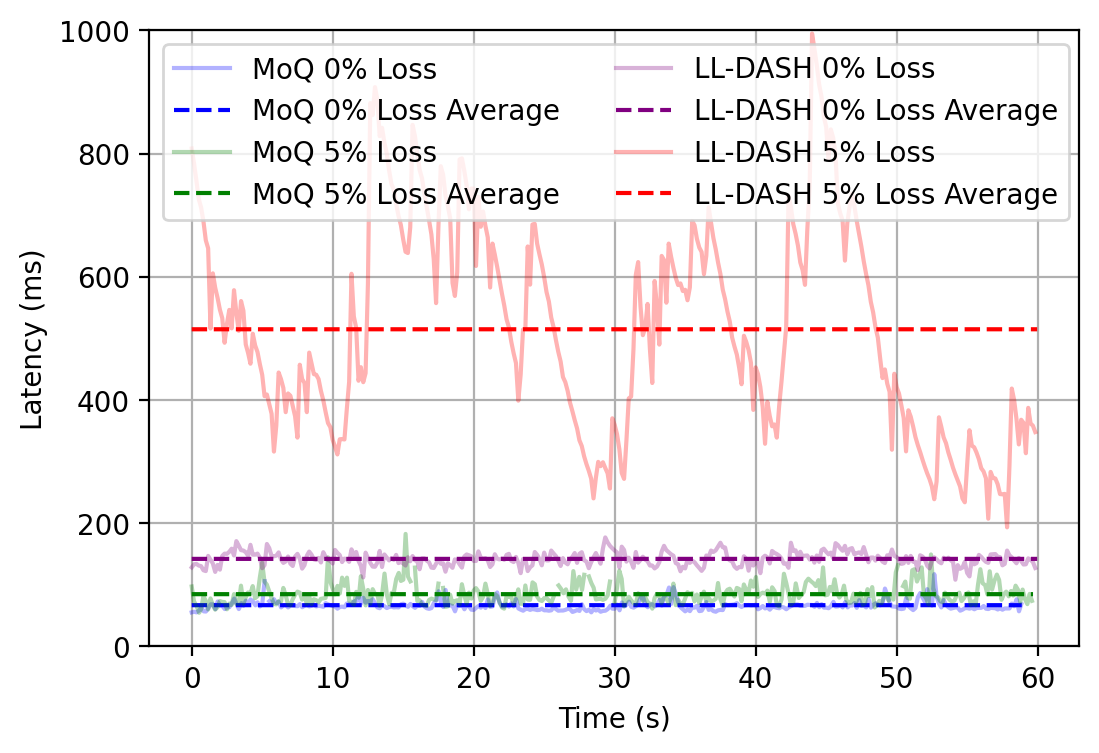

In [23]:
plt.figure(figsize=(6, 4), dpi=200)

#plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
# plt.xlim(left=0.5, right=3.5)
# plt.ylim(bottom=10, top=45)
# plt.plot(timestamps_0, smoothed_0, "-o", color="g", label='MoQ 0% Loss')
# plt.legend(loc='lower left', ncol=2, bbox_to_anchor=(0, 0))
#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)

plt.ylim(top=1000)

plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')

plt.plot(timestamps_0, smoothed_0, label='MoQ 0% Loss', color='blue', alpha=0.3)
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_total_time'].iloc[0]] * len(df_data_0), label='MoQ 0% Loss Average', color='blue', linestyle='dashed')

plt.plot(timestamps_1, smoothed_1, label='MoQ 5% Loss', color='green', alpha=0.3)
plt.plot(df_data_1['_1_rawVideoTimestamp'], [df_data_1['avg_total_time'].iloc[0]] * len(df_data_1), label='MoQ 5% Loss Average', color='green', linestyle='dashed')

plt.plot(timestamps_2, smoothed_2, label='LL-DASH 0% Loss', color='purple', alpha=0.3)
plt.plot(df_data_2['second'], [df_data_2['avg_total_time'].iloc[0]] * len(df_data_2), label='LL-DASH 0% Loss Average', color='purple', linestyle='dashed')

plt.plot(timestamps_3, smoothed_3, label='LL-DASH 5% Loss', color='red', alpha=0.3)
plt.plot(df_data_3['second'], [df_data_3['avg_total_time'].iloc[0]] * len(df_data_3), label='LL-DASH 5% Loss Average', color='red', linestyle='dashed')

plt.legend(loc='upper left', ncol=2)
plt.grid(True)

plt.savefig(f'plots/moq-dash-packet-loss-constrains.pdf', bbox_inches='tight')